# ALTERNATIVE TIME SERIES

### Step 1: Loading the dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
total_data = pd.read_csv(url, sep=',')
total_data.to_csv('../data/raw/sales_data.csv', index=False)

In [18]:
total_data.head(-5) 

date       sales
0    2022-09-03 17:10:08.079328   55.292157
1    2022-09-04 17:10:08.079328   53.803211
2    2022-09-05 17:10:08.079328   58.141693
3    2022-09-06 17:10:08.079328   64.530899
4    2022-09-07 17:10:08.079328   66.013633
..                          ...         ...
356  2023-08-25 17:10:08.079328  971.046134
357  2023-08-26 17:10:08.079328  977.744160
358  2023-08-27 17:10:08.079328  980.341854
359  2023-08-28 17:10:08.079328  986.244637
360  2023-08-29 17:10:08.079328  989.081673

[361 rows x 2 columns]

### Step 2: Construct and analyze the time serie

In [19]:
total_data["date"] = pd.to_datetime(total_data.date)
total_data = total_data.set_index("date")
ts = total_data["sales"]

*  Graph the plot

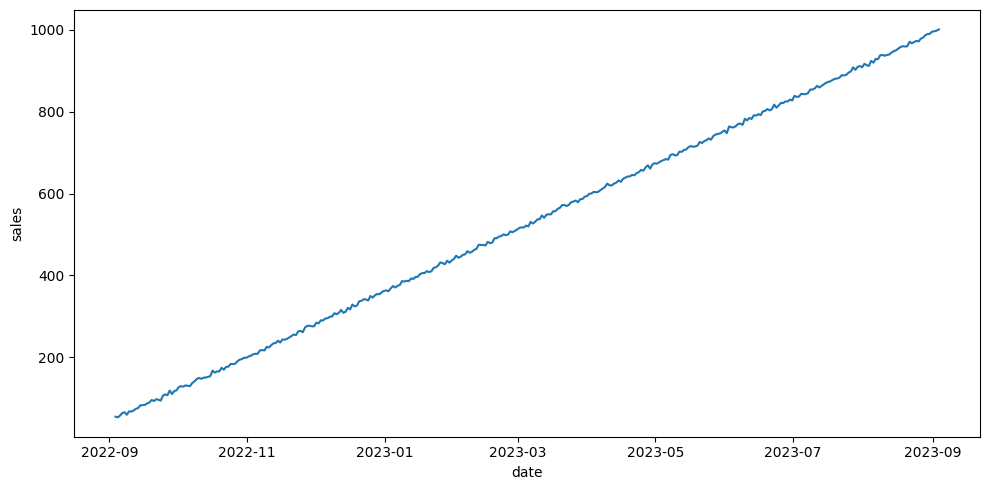

In [20]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()
plt.show()

***TREND:***

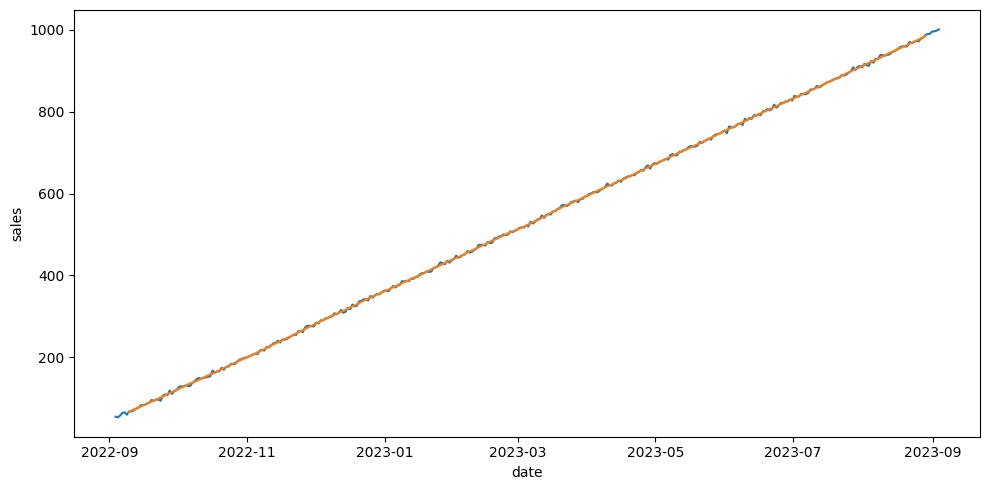

In [21]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 12)

trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

***An upward trend in sales is clearly seen***

***SEASONALITY:***

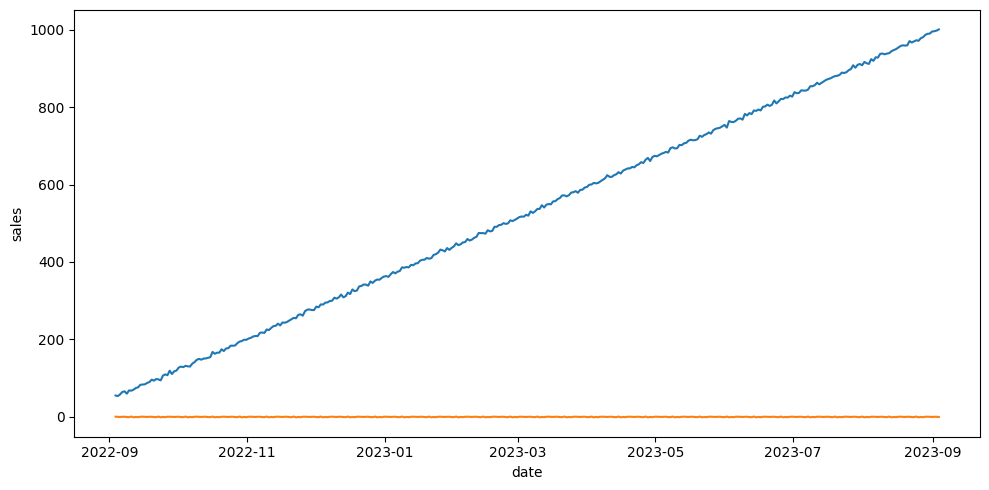

In [22]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

***The p-value is higher than 0.05, so the series is not stationary. We will work with this time serie without transforming it***

***VARIABILITY:***

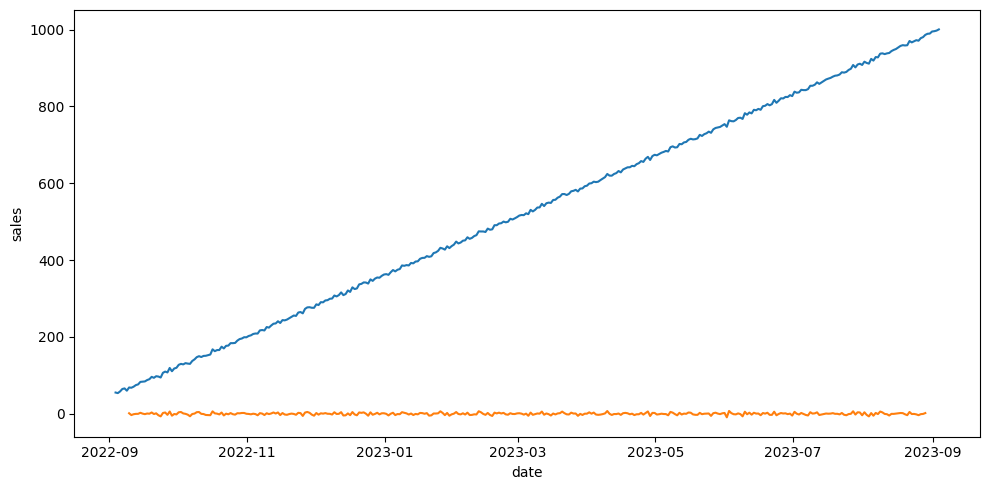

In [24]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

***Certain points of variability are observed in the time series, but it does not cause the trend to change since they are minimal***

***AUTOCORRELATION:***

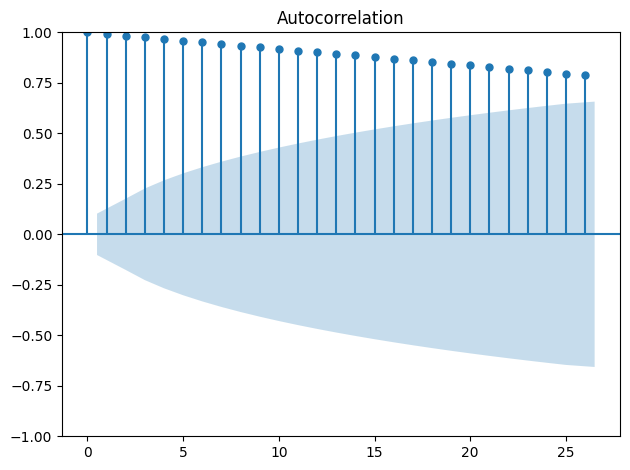

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

***The autocorrelation is periodically lost, which hinders the predictive capacity of the model***

#### After the analysis:
* Which is the tensor of the time serie?
***Day***
* Which is the trend?
***There is an upward trend, which indicates that the number of sales has increased throughout the year***
* Is it stationary?
***No, it is increasing over time***
* Is there variability or noise?
***It has very few daily downward variations. For the most part, sales are growing every day***

### Step 3: Train an ARIMA

In [26]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal = False, trace = True, m = 12)

/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.578 seconds


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Fri, 15 Dec 2023   AIC                           1839.552
Time:                        20:03:05   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Step 4: Predict with the test set

In [38]:
forecast = model.predict(200)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
                                 ...     
2024-03-17 17:10:08.079328    1508.805151
2024-03-18 17:10:08.079328    1511.402982
2024-03-19 17:10:08.079328    1514.000813
2024-03-20 17:10:08.079328    1516.598645
2024-03-21 17:10:08.079328    1519.196476
Freq: D, Length: 200, dtype: float64

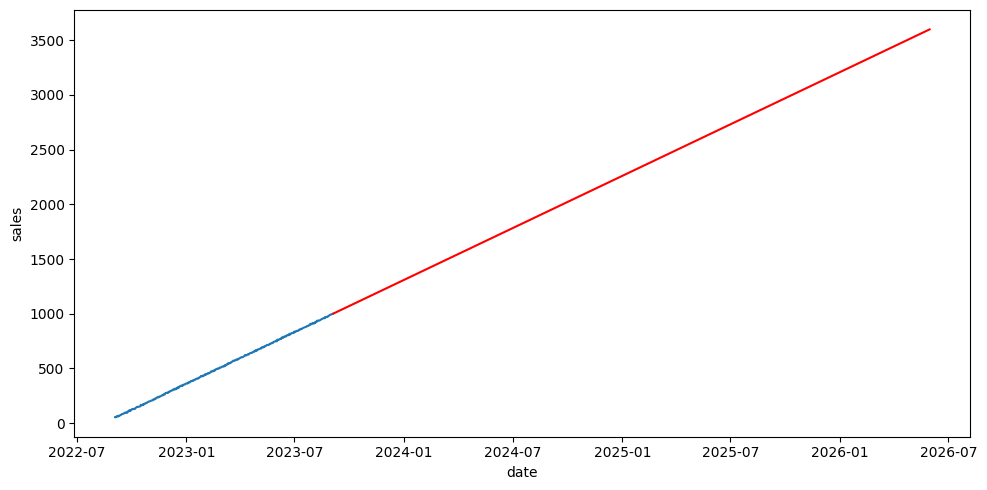

In [37]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "red")

plt.tight_layout()

plt.show()

### Step 5: Save the model

In [30]:
from pickle import dump

dump(model, open('/workspaces/JLL_Alternative_Time_Series/models/arima_deffault.sav', 'wb'))